In [1]:
# Balle - Program to compute the trajectory of a baseball using the Euler method.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def intrpf(xi, x, y):
    """
    Function to interpolate between data points using Lagrange polynomial (quadratic).
    :param xi: The x value where interpolation is computed
    :param x: Vector of x coordinates of data points (3 values)
    :param y: Vector of y coordinates of data points (3 values)
    :return yi: The interpolation polynomial evaluated at xi
    """
    # Calculate yi = p(xi) using the Lagrange polynomial
    yi = (
        ((xi - x[1]) * (xi - x[2])) / ((x[0] - x[1]) * (x[0] - x[2])) * y[0]
        + ((xi - x[0]) * (xi - x[2])) / ((x[1] - x[0]) * (x[1] - x[2])) * y[1]
        + ((xi - x[0]) * (xi - x[1])) / ((x[2] - x[0]) * (x[2] - x[1])) * y[2]
    )

    return yi

In [16]:


# Set initial position and velocity of the baseball
y0 = 0
r0 = np.array([0., y0])  # Initial vector position
speed = 50
theta = 45

v0 = np.array([speed * np.cos(theta*np.pi/180), speed * np.sin(theta*np.pi/180)])  # initial velocity
r = np.copy(r0)  # Set initial position
v = np.copy(v0)  # Set initial velocity

# Set physical parameters (mass, Cd, etc.)
Cd = 0.35  # Drag coefficient (dimensionless)
area = 4.3e-3  # Cross-sectional area of projectile (m^2)
mass = 0.145   # Mass of projectile (kg)
grav = 9.81    # Gravitational acceleration (m/s^2)

# Set air resistance flag
# airFlag = eval(input('Add air resistance? (Yes: 1 No: 0)'))
airFlag = 0
if airFlag == 0:
    rho = 0.       # No air resistance
    air_text = '(no air)'
else:
    rho = 1.2     # Density of air (kg/m^3)
    air_text = '(with air)'
air_const = -0.5*Cd*rho*area/mass   # Air resistance constant

# * Loop until ball hits ground or max steps completed
# tau = eval(input('Enter timestep dt in seconds: '))  # (sec)
tau = .1
maxstep = 1000
laststep = maxstep

# Set up arrays for data
xplot = np.empty(maxstep)
yplot = np.empty(maxstep)

x_noAir = np.empty(maxstep)
y_noAir = np.empty(maxstep)

for istep in range(maxstep):
    t = istep * tau  # Current time

    # Record computed position for plotting
    xplot[istep] = r[0]
    yplot[istep] = r[1]

    x_noAir[istep] = r0[0] + v0[0]*t
    y_noAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2

    # Calculate the acceleration of the ball
    accel = air_const * np.linalg.norm(v) * v  # Air resistance
    accel[1] = accel[1] - grav # update y acceleration to include gravity

    # Calculate the new position and velocity using Euler's method.
    r = r + tau * v  # Euler step
    v = v + tau * accel
#     If the ball reaches the ground (i.e. y < 0), break out of the loop
    if r[1] <= 0:
        laststep = istep
        xplot[laststep] = r[0]  # Record last values completed
        yplot[laststep] = r[1]

        # x_noAir[laststep] = r0[0] + v0[0] * t
        # y_noAir[laststep] = r0[1] + v0[1] * t - 0.5 * grav * t ** 2
        break  # Break out of the for loop

# # Print maximum range and time of flight
print('Maximum range is {0:.2f} meters'.format(r[0]))
print('Time of flight is {0:.1f} seconds'.format(laststep * tau))



Maximum range is 261.63 meters
Time of flight is 7.3 seconds


In [11]:
xinter = xplot[laststep-2:laststep+1] # +1 to include negative value from previous overestimation
yinter = yplot[laststep-2:laststep+1]
xguess = (xinter[-1] + xinter[-2])/2
tol = 1e-3
xguess_arr = np.arange(xguess, xinter[-1], tol)

print(xinter)
print(yinter)

[251.02290732 254.55844123 261.62950904]
[ 7.24440732  3.81484123 -3.33859096]


In [14]:

for i,x in enumerate(xguess_arr):
#     print(f'{x} : {intrpf(x, xinter, yinter)}')
    if(intrpf(x, xinter, yinter)<0):
        stopiter = i-1
        break

max_range = xguess_arr[stopiter]
# Print maximum range and time of flight
print(f'Corrected Maximum range is {max_range:.2f} meters')
print(f'Corrected Time of flight is {laststep * tau:.1f} seconds')


Maximum range is 258.38 meters
Time of flight is 7.3 seconds


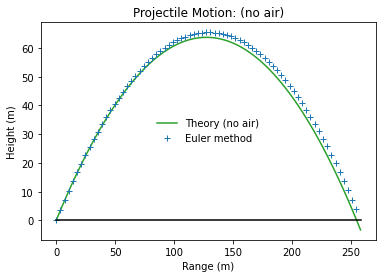

In [15]:
# Graph the trajectory of the baseball
fig, ax = plt.subplots()
ax.set_title('Projectile Motion: ' + air_text)
ax.plot(x_noAir[:laststep+1], y_noAir[:laststep+1], '-', c='C2', label='Theory (no air)')
ax.plot(xplot[:laststep], yplot[:laststep], '+', label='Euler method')
# Mark the location of the ground by a straight line
ax.plot(np.array([0.0, x_noAir[laststep]]), np.array([0.0, 0.0]), '-', color='k')
ax.legend(frameon=False)
ax.set_xlabel('Range (m)')
ax.set_ylabel('Height (m)')

plt.show()
